<a href="https://colab.research.google.com/github/mesha4545a/Assigment-2/blob/master/Copy_of_02_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Assignment

Note: target variable is `total_amount`.


1. Load in a sample of the NYC taxi dataset through this parquet link: `https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet`

In [3]:
import pandas as pd
df = pd.read_parquet('https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet')
df


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-21 07:55:21,2019-12-21 08:00:18,1.0,1.20,1.0,N,148,4,2.0,6.5,2.5,0.5,0.00,0.0,0.3,9.80,2.5
1,1.0,2019-12-08 13:20:45,2019-12-08 13:28:32,1.0,1.10,1.0,N,113,90,1.0,7.0,2.5,0.5,3.00,0.0,0.3,13.30,2.5
2,2.0,2019-12-28 14:41:40,2019-12-28 14:52:29,1.0,1.12,1.0,N,186,137,2.0,8.0,0.0,0.5,0.00,0.0,0.3,11.30,2.5
3,2.0,2019-12-05 23:42:35,2019-12-05 23:59:18,2.0,3.80,1.0,N,230,263,1.0,14.5,0.5,0.5,3.66,0.0,0.3,21.96,2.5
4,1.0,2019-12-13 12:30:25,2019-12-13 12:45:04,2.0,2.10,1.0,N,162,239,1.0,11.5,2.5,0.5,3.00,0.0,0.3,17.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482737,1.0,2019-12-12 15:22:02,2019-12-12 15:25:26,1.0,0.20,1.0,N,140,140,1.0,4.0,0.0,0.5,0.95,0.0,0.3,5.75,0.0
482738,1.0,2019-12-28 18:36:46,2019-12-28 18:44:33,1.0,1.80,1.0,N,263,75,2.0,8.0,2.5,0.5,0.00,0.0,0.3,11.30,2.5
482739,1.0,2019-12-07 19:58:00,2019-12-07 20:17:30,1.0,1.40,1.0,N,246,164,1.0,12.5,2.5,0.5,3.15,0.0,0.3,18.95,2.5
482740,2.0,2019-12-14 12:27:36,2019-12-14 12:43:30,1.0,5.58,1.0,N,170,88,1.0,18.5,0.0,0.5,4.36,0.0,0.3,26.16,2.5


2. Find out some information about the data...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482742 entries, 0 to 482741
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               479098 non-null  float64
 1   tpep_pickup_datetime   482742 non-null  object 
 2   tpep_dropoff_datetime  482742 non-null  object 
 3   passenger_count        479098 non-null  float64
 4   trip_distance          482742 non-null  float64
 5   RatecodeID             479098 non-null  float64
 6   store_and_fwd_flag     479098 non-null  object 
 7   PULocationID           482742 non-null  int64  
 8   DOLocationID           482742 non-null  int64  
 9   payment_type           479098 non-null  float64
 10  fare_amount            482742 non-null  float64
 11  extra                  482742 non-null  float64
 12  mta_tax                482742 non-null  float64
 13  tip_amount             482742 non-null  float64
 14  tolls_amount           482742 non-nu

In [ ]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,479098.000000,479098.000000,482742.000000,479098.000000,482742.000000,482742.000000,479098.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000
mean,1.666173,1.550393,2.977807,1.065156,163.502449,161.722570,1.298091,14.358827,1.110255,0.492481,2.245453,0.390203,0.298011,20.414273,2.275034
std,0.471579,1.174092,3.941160,0.903839,66.172609,70.222873,0.487450,573.620806,1.269991,0.071925,2.853395,1.699026,0.033592,573.684344,0.735852
min,1.000000,0.000000,-30.100000,1.000000,1.000000,1.000000,1.000000,-180.000000,-4.500000,-0.500000,-98.760000,-21.230000,-0.300000,-180.300000,-2.500000
25%,1.000000,1.000000,0.960000,1.000000,125.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.300000,2.500000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.920000,0.000000,0.300000,14.800000,2.500000
75%,2.000000,2.000000,3.020000,1.000000,233.000000,234.000000,2.000000,15.500000,2.500000,0.500000,3.000000,0.000000,0.300000,21.350000,2.500000
max,2.000000,9.000000,93.740000,99.000000,265.000000,265.000000,4.000000,398468.380000,90.060000,0.900000,225.000000,113.880000,0.300000,398471.200000,2.750000


In [ ]:
df.describe(exclude = 'number')

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
count,482742,482742,479098
unique,430916,430729,2
top,2019-12-14 11:41:43,2019-12-22 00:00:00,N
freq,5,7,473713


3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.165798,0.025826,0.009225,-0.006963,-0.002515,-0.012707,-0.001725,-0.858735,-0.028355,0.021642,0.010144,-0.039408,-0.001597,-0.009748
passenger_count,0.165798,1.000000,0.019496,0.000271,-0.006724,-0.004947,0.016564,-0.000294,-0.135692,0.002063,0.000780,0.012475,0.003783,-0.000227,0.013716
trip_distance,0.025826,0.019496,1.000000,0.144107,-0.094794,-0.107132,-0.020566,0.017491,0.001632,-0.085268,0.506991,0.615388,0.018388,0.021689,-0.210402
RatecodeID,0.009225,0.000271,0.144107,1.000000,-0.008881,0.002503,0.006139,0.004868,-0.022093,-0.181959,0.133305,0.155296,-0.039509,0.005854,-0.094704
PULocationID,-0.006963,-0.006724,-0.094794,-0.008881,1.000000,0.107039,-0.028173,-0.000217,0.015927,0.010784,-0.027828,-0.049324,0.002824,-0.000370,0.127982
DOLocationID,-0.002515,-0.004947,-0.107132,0.002503,0.107039,1.000000,-0.029818,-0.000392,0.014882,0.028633,-0.034075,-0.065728,-0.000009,-0.000616,0.129009
payment_type,-0.012707,0.016564,-0.020566,0.006139,-0.028173,-0.029818,1.000000,0.006944,-0.021476,-0.178163,-0.484442,-0.033897,-0.221938,0.004156,-0.175131
fare_amount,-0.001725,-0.000294,0.017491,0.004868,-0.000217,-0.000392,0.006944,1.000000,0.001580,-0.006006,0.010816,0.012652,-0.010373,0.999976,-0.004353
extra,-0.858735,-0.135692,0.001632,-0.022093,0.015927,0.014882,-0.021476,0.001580,1.000000,0.063720,0.002841,0.002643,0.064156,0.002209,0.147109
mta_tax,-0.028355,0.002063,-0.085268,-0.181959,0.010784,0.028633,-0.178163,-0.006006,0.063720,1.000000,-0.060702,-0.168105,0.744811,-0.006107,0.409854


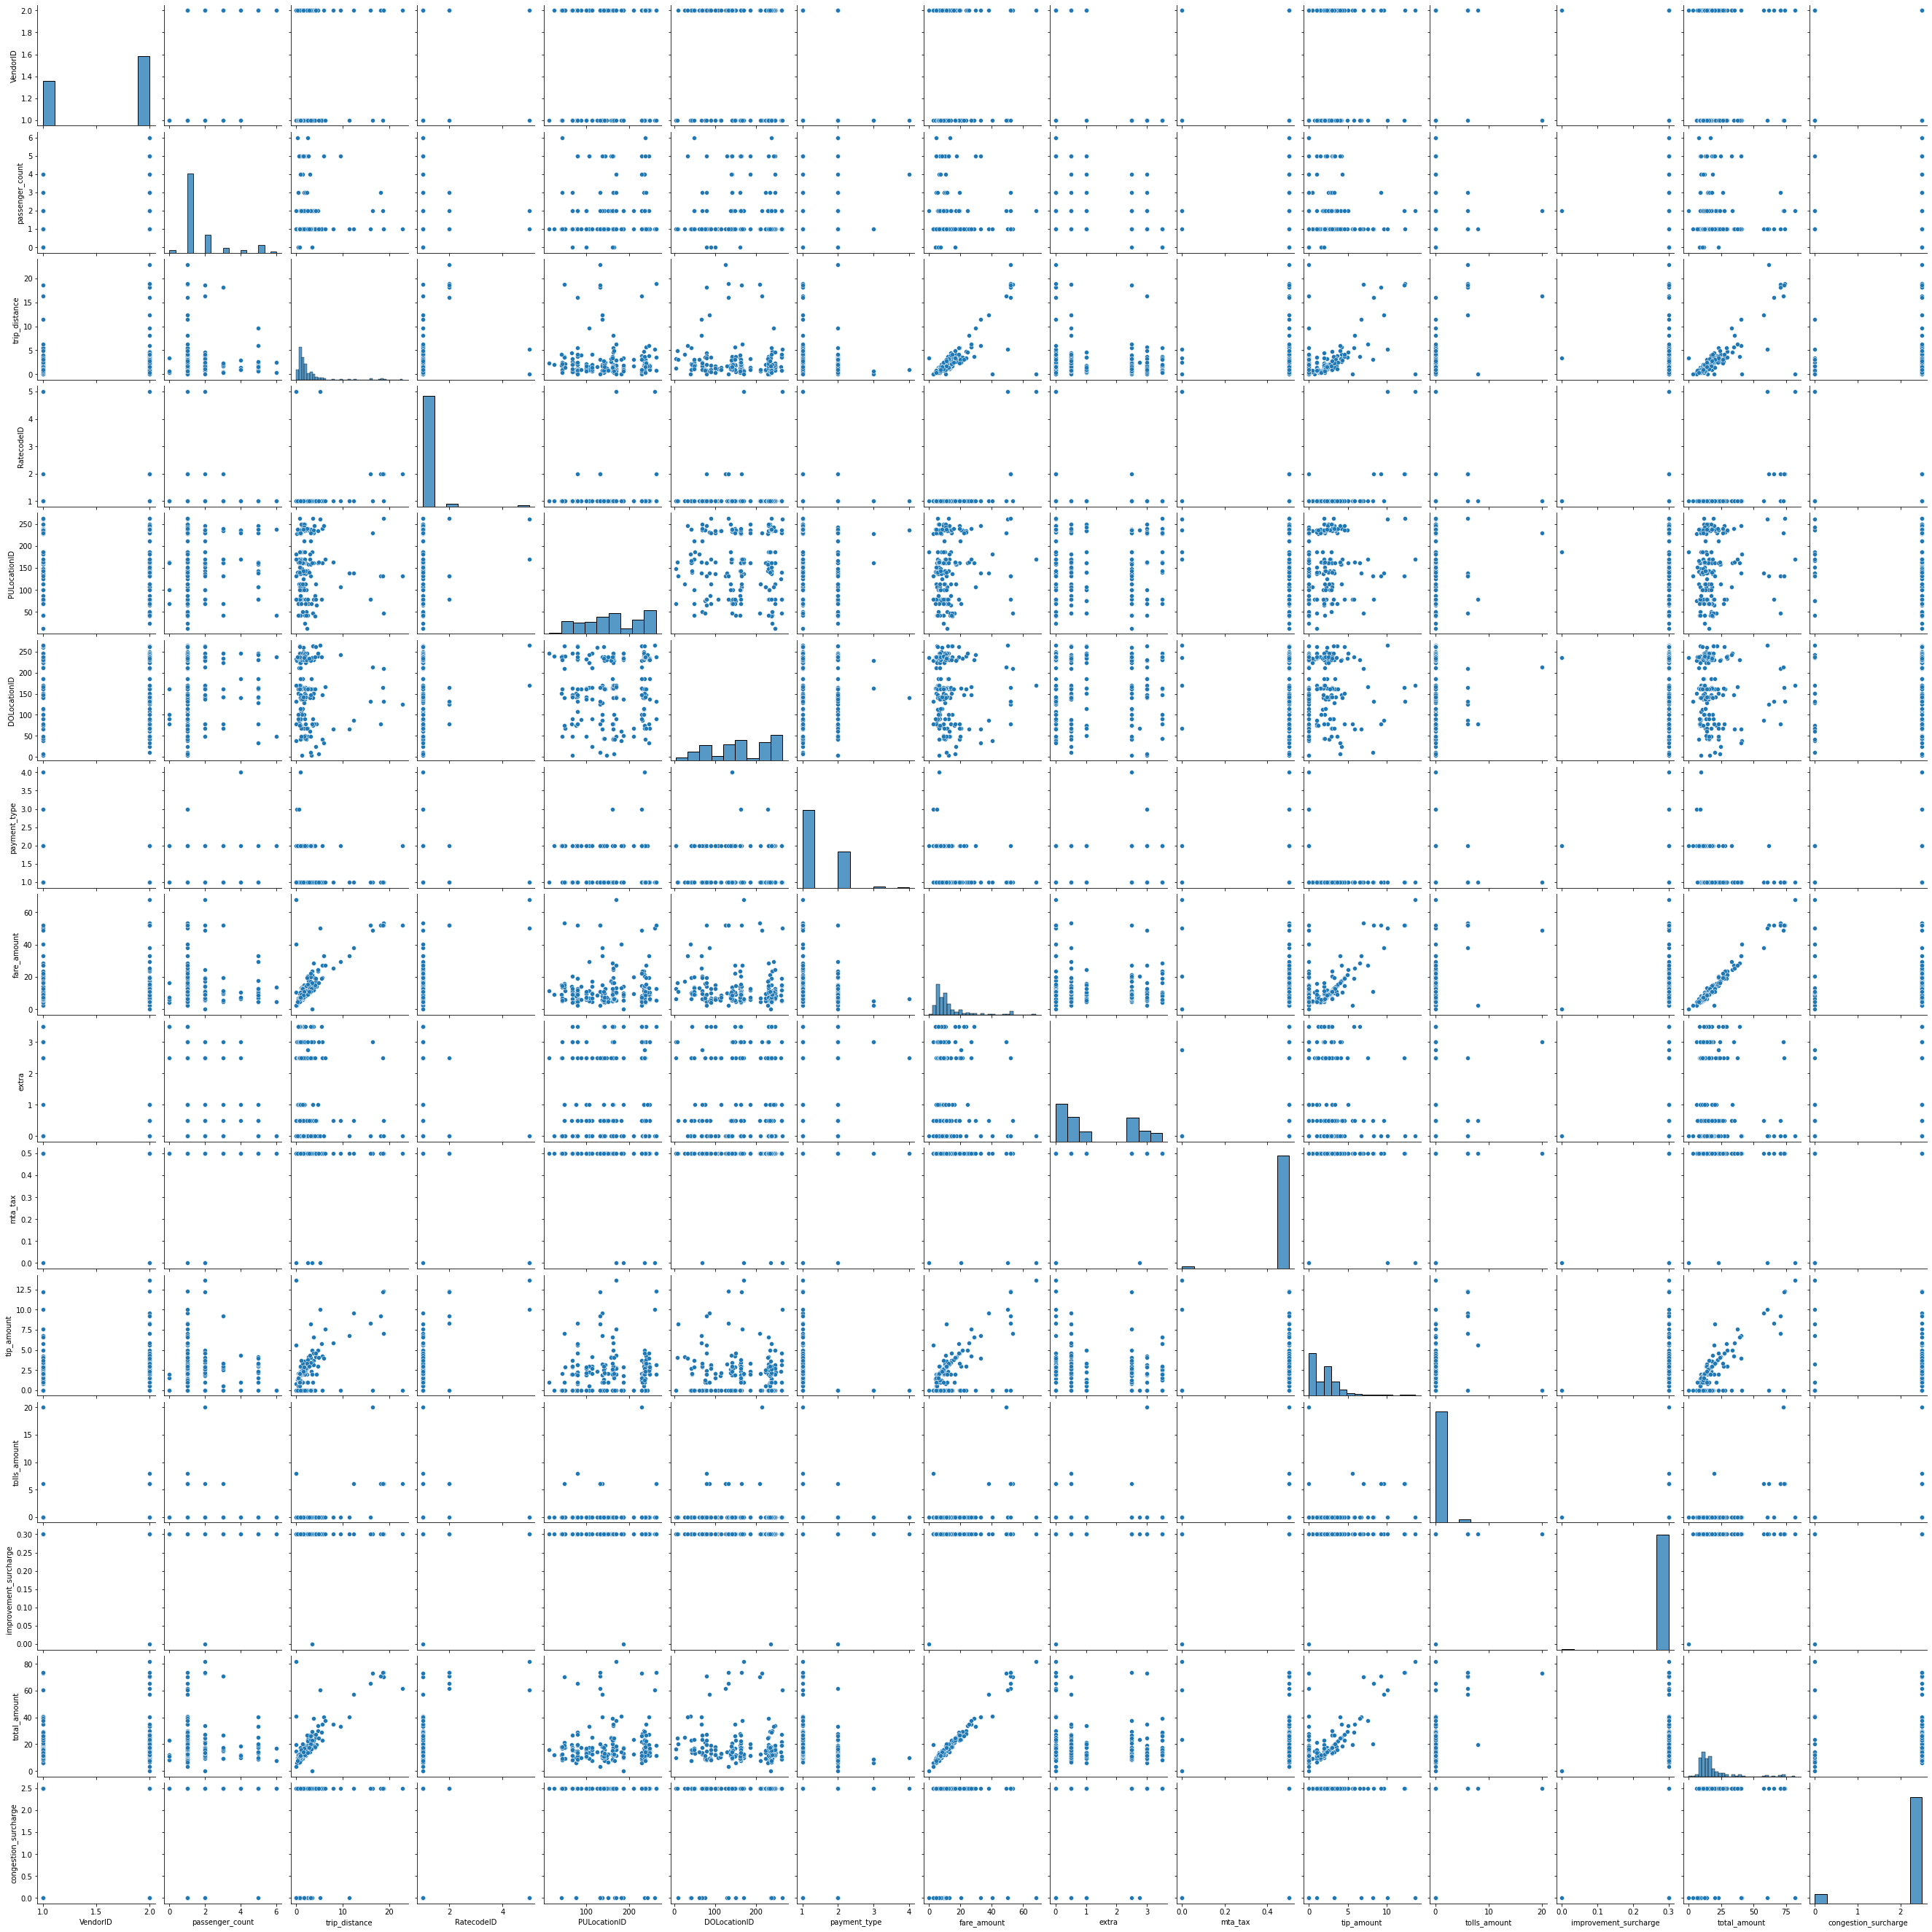

In [4]:
import seaborn as sns
sns.pairplot(df.head(200))
sns.set(rc={'figure.figsize':(15,8)})

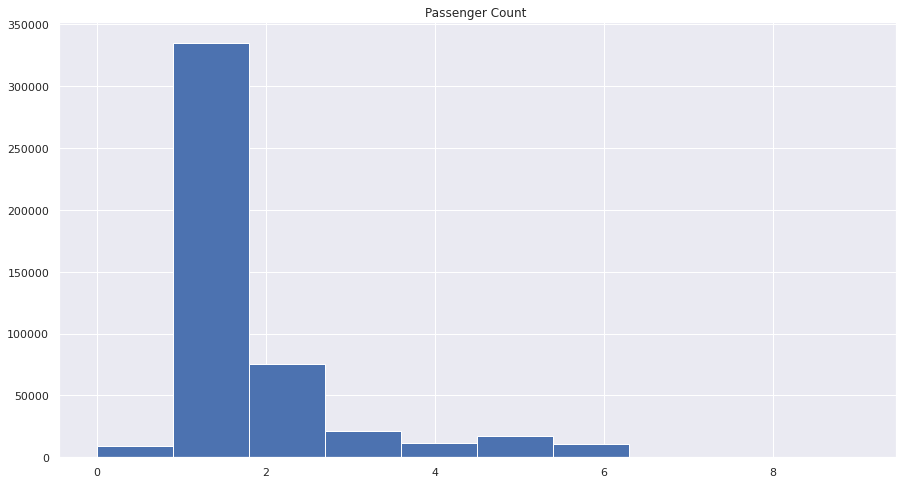

In [6]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,8)})
plt.hist(df['passenger_count'])
plt.title("Passenger Count ")
plt.show()

4. Split your data into training and testing datasets...

In [7]:
from sklearn.model_selection import train_test_split

#          'improvement_surcharge',
#           'trip_distance',
#           'tip_amount'
    # similar corr to tax
        

X = df.fare_amount
y = df.total_amount

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

5. Import, create, and fit a LinearRegression model with 1 variable

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True, normalize=False)

In [9]:
lr.fit(pd.DataFrame(X_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

6. Make predictions on your `X_test` values...

In [10]:
predictions = lr.predict(pd.DataFrame(X_test))

predictions

array([10.55339601, 15.05367936, 58.05638698, ..., 18.55389975,
       12.55352194, 18.55389975])

In [14]:
# what do they look like? (show me some of the predictions)
predictions[-5:]


array([11.05342749, 12.05349046, 18.55389975, 12.55352194, 18.55389975])

In [15]:
y_test.tail()

51895      9.96
289341    11.80
194677    18.96
373906     9.80
218868    16.80
Name: total_amount, dtype: float64

7. Score your model...
- r2_score
- other metric (of your choice...)

In [16]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=predictions)

0.9316024197163262

In [17]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=y_test, y_pred=predictions)

2.3113099127342647

8. Create, and fit a LinearRegression model with **more than** 1 variable

In [123]:

vars = [
        'fare_amount',
        'improvement_surcharge',
          'trip_distance',
           'tip_amount'
]

X = df[vars]
y = df.total_amount

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

In [33]:
lr.fit(pd.DataFrame(X_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

9. Make predictions on your `X_test` values...

In [34]:
pre = lr.predict(pd.DataFrame(X_test))

pre

array([ 9.42718547, 15.19777955, 72.53798777, ..., 19.60080555,
        9.68333529, 15.68736944])

In [35]:
# what do they look like? (show me some of the predictions)
pre[-5:]

array([ 9.97298549, 11.43428567, 19.60080555,  9.68333529, 15.68736944])

In [36]:
y_test.tail()

51895      9.96
289341    11.80
194677    18.96
373906     9.80
218868    16.80
Name: total_amount, dtype: float64

10. Score your model...
- r2_score
- other metric (of your choice...)

In [37]:
r2_score(y_true=y_test, y_pred=pre)

0.9900324841609239

In [38]:
mean_absolute_error(y_true=y_test, y_pred=pre)

0.8333640772793114

11. Which model is better? Why?
the second 
more parameter in x = more accuracy

type your stuff here

12. Perform GridSearchCV with the better data

In [120]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [125]:
from sklearn.model_selection import GridSearchCV

p_grid = {'fit_intercept': [True, False],
          'normalize': [True, False]}

grid = GridSearchCV(lr, p_grid)

In [126]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [111]:
grid.best_params_

{'fit_intercept': True, 'normalize': True}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [112]:
l= LinearRegression(fit_intercept=True,
                      normalize=True)

In [113]:
l.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [114]:
preds = l.predict(X_test)
preds

array([ 9.42718547, 15.19777955, 72.53798777, ..., 19.60080555,
        9.68333529, 15.68736944])

14. Score the new model... 
- r2_score
- some other metric of your choice

In [115]:
r2_score(y_true=y_test, y_pred=preds)

0.9900324841609239

In [116]:
mean_absolute_error(y_true=y_test, y_pred=preds)

0.8333640772793208

Did the score change at all? Why?

your stuff here
no, it the same. maybe because the model already at its best because it uses more than one parameter